In [181]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from mpl_toolkits import mplot3d
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [19]:
%matplotlib inline  

In [81]:
def find_num_right(f, labels):
    num_right = 0
    looking = f - labels
    for i in range(len(f)):
        if abs(looking[i]) == 0:
            num_right += 1
    return num_right / len(f)

C:\Users\16kat\OneDrive\Documents\Spring 2020\AMATH 563
C:\Users\16kat\OneDrive\Documents\Spring 2020\AMATH 563\CroppedYale
(2432, 32256)
(2432,)


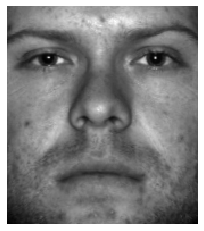

512
(2432, 32256)


In [132]:

script_dir = os.path.dirname(os.path.realpath('__file__')) #<-- absolute dir the script is in
print(script_dir)
rel_path = "CroppedYale"
abs_file_path = os.path.join(script_dir, rel_path)

print(abs_file_path)
faces = []
labels = []
female_faces = []
male_faces = []

for fname in os.listdir(abs_file_path):
    if fname in ['yaleB05', 'yaleB15', 'yaleB22', 'yaleB27', 'yaleB28', 'yaleB32', 'yaleB34', 'yaleB37']:
        female = True
    else:
        female = False
    for fname2 in os.listdir(os.path.join(script_dir, rel_path, fname)):
        img = np.array(Image.open(os.path.join(script_dir, rel_path, fname, fname2)))
        faces.append((img.T).reshape(192*168))
        if (female):
            labels.append(1)
            female_faces.append((img.T).reshape(192*168))
        else:
            labels.append(0)
            male_faces.append((img.T).reshape(192*168))

        
        
# print(np.array(cropped_faces).shape)
faces = np.array(faces)
labels = np.array(labels)
print(faces.shape)
print(labels.shape)
# print(cropped_faces.shape)



face = np.reshape(faces[0,:],(168,192)).T
img = plt.imshow(face)
img.set_cmap('gray')
plt.axis('off')
plt.show()

#break up a testing and training set
x_train,x_test,y_train,y_test=train_test_split(faces,labels,test_size=0.2)

n_female = len(female_faces)
print(n_female)
faces_sorted = np.array(np.concatenate((female_faces, male_faces)))
print(faces_sorted.shape)
# print(faces.shape)

In [83]:
#Using A/b to predict male and female

tup = np.linalg.lstsq(x_train, y_train)
x = tup[0]
f = np.matmul(x_train, x)
max_f = np.zeros(f.shape)
for i in range(len(f)):
    if f[i] > 0.5:
        max_f[i] = 1
        
# print(sum(max_f))
error = np.linalg.norm(y_train - max_f, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using least squares = ", error)
print("Training Accuracy using Least Squares = ", find_num_right(max_f, y_train))

f_test = np.matmul(x_test, x)
max_f_test = np.zeros(f_test.shape)
for i in range(len(f_test)):
    if f_test[i] > 0.5:
        max_f_test[i] = 1
        
error_test = np.linalg.norm(y_test - max_f_test, ord=2)/np.linalg.norm(y_test, ord=2)
print("Testing error using Least squares = ", error_test)
print("Testing Accuracy using Least Squares = ", find_num_right(max_f_test, y_test))



C:\Users\16kat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


Training error using least squares =  0.05018856132284956
Training Accuracy using Least Squares =  0.9994858611825193
Testing error using Least squares =  0.484543711852349
Testing Accuracy using Least Squares =  0.944558521560575


In [86]:
#Using lasso to predict male and female

clf = linear_model.Lasso(alpha=0.03)
clf.fit(x_train, y_train)
x = clf.coef_
x = np.transpose(x)
f = np.matmul(x_train, x)
max_f = np.zeros(f.shape)
for i in range(len(f)):
    if f[i] > 0.5:
        max_f[i] = 1
        
# print(sum(max_f))
error = np.linalg.norm(y_train - max_f, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using Lasso = ", error)
print("Training Accuracy using Lasso = ", find_num_right(max_f, y_train))

f_test = np.matmul(x_test, x)
max_f_test = np.zeros(f_test.shape)
for i in range(len(f_test)):
    if f_test[i] > 0.5:
        max_f_test[i] = 1
        
error_test = np.linalg.norm(y_test - max_f_test, ord=2)/np.linalg.norm(y_test, ord=2)
print("Testing error using Lasso = ", error_test)
print("Testing Accuracy using Lasso = ", find_num_right(max_f_test, y_test))



C:\Users\16kat\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.536167145033671, tolerance: 0.03159670951156814
  positive)


Training error using Lasso =  0.43464569084980853
Training Accuracy using Lasso =  0.961439588688946
Testing error using Lasso =  0.5356832289134414
Testing Accuracy using Lasso =  0.9322381930184805


In [51]:
#using kmeans in unsupervized 
kmeans = KMeans(n_clusters=2, random_state=0).fit(x_train)

In [82]:
print((kmeans.labels_).shape)
print(x_train[:,0].shape)
print(kmeans.predict(x_train))

max_f = kmeans.predict(x_train)
# print(sum(max_f))
error = np.linalg.norm(y_train - max_f, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using kmeans = ", error)
print("Training Accuracy using kmeans = ", find_num_right(max_f, y_train))

# f_test = np.matmul(x_test, x)
max_f_test = kmeans.predict(x_test)
        
error_test = np.linalg.norm(y_test - max_f_test, ord=2)/np.linalg.norm(y_test, ord=2)
print("Testing error using kmeans = ", error_test)
print("Testing Accuracy using kmeans = ", find_num_right(max_f_test, y_test))


(1945,)
(1945,)
[0 0 1 ... 1 0 0]
Training error using kmeans =  1.50649308348208
Training Accuracy using kmeans =  0.5367609254498714
Testing error using kmeans =  1.335143698502964
Testing Accuracy using kmeans =  0.5790554414784395


In [182]:
#k nearest neighbors
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)


max_f = neigh.predict(x_train)
# print(sum(max_f))
error = np.linalg.norm(y_train - max_f, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using knn = ", error)
print("Training Accuracy using knn = ", find_num_right(max_f, y_train))

# f_test = np.matmul(x_test, x)
max_f_test = neigh.predict(x_test)
        
error_test = np.linalg.norm(y_test - max_f_test, ord=2)/np.linalg.norm(y_test, ord=2)
print("Testing error using knn = ", error_test)
print("Testing Accuracy using knn = ", find_num_right(max_f_test, y_test))


Training error using knn =  0.31698338899620837
Training Accuracy using knn =  0.9784061696658097
Testing error using knn =  0.5554373396683664
Testing Accuracy using knn =  0.9404517453798767


In [135]:
#mixute models
u,s,vT = np.linalg.svd(faces_sorted-np.mean(faces_sorted),full_matrices=0)
v = vT.T

(32256, 2432)
(1945, 2432)


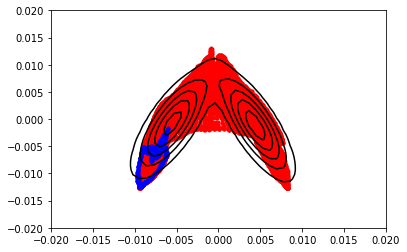

In [160]:
dogcat = v[:,(1,3)]
GMModel = GaussianMixture(n_components=2).fit(dogcat)
AIC = GMModel.aic(dogcat)
print(v.shape)
# female = np.array(v)[np.array(y_train)]# np.array([x for v, y in zip(v, y_train) if y == 1])
print(female.shape)
plt.plot(v[n_female:,1],v[n_female:,3],'r.', zorder = 1)#,MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
plt.plot(v[:n_female,1],v[:n_female,3],'b.', zorder = 2)#,MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)

x = np.linspace(-0.02, 0.02)
y = np.linspace(-0.02, 0.02)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = np.exp(GMModel.score_samples(XX))
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z,colors='k',linestyles='solid', zorder = 3)

plt.show()

In [163]:
f = GMModel.fit_predict(x_train)
print(f)

MemoryError: 

In [169]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_train)
y_test_pred = gnb.predict(x_test)

error = np.linalg.norm(y_train - y_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using Navie Bayes = ", error)
print("Training Accuracy using Navie Bayes = ", find_num_right(y_pred, y_train))

error_test = np.linalg.norm(y_test - y_test_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Testing error using Navie Bayes = ", error_test)
print("Testing Accuracy using Navie Bayes = ", find_num_right(y_test_pred, y_test))

Training error using Navie Bayes =  1.2119816506577565
Training Accuracy using Navie Bayes =  0.6843187660668381
Testing error using Navie Bayes =  0.6148092636110891
Testing Accuracy using Navie Bayes =  0.675564681724846


In [173]:
#LDA
clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
# LinearDiscriminantAnalysis()
y_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


error = np.linalg.norm(y_train - y_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using LDA = ", error)
print("Training Accuracy using LDA = ", find_num_right(y_pred, y_train))

error_test = np.linalg.norm(y_test - y_test_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Testing error using LDA = ", error_test)
print("Testing Accuracy using LDA = ", find_num_right(y_test_pred, y_test))

C:\Users\16kat\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Training error using LDA =  0.06917144638660747
Training Accuracy using LDA =  0.9989717223650385
Testing error using LDA =  0.24455799402225925
Testing Accuracy using LDA =  0.9486652977412731


In [175]:
#Quadratic DA
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)
# LinearDiscriminantAnalysis()
y_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)


error = np.linalg.norm(y_train - y_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using QDA = ", error)
print("Training Accuracy using QDA = ", find_num_right(y_pred, y_train))

error_test = np.linalg.norm(y_test - y_test_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Testing error using QDA = ", error_test)
print("Testing Accuracy using QDA = ", find_num_right(y_test_pred, y_test))

C:\Users\16kat\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Training error using QDA =  0.0
Training Accuracy using QDA =  1.0
Testing error using QDA =  0.5745811871875518
Testing Accuracy using QDA =  0.7166324435318275


In [178]:
Mdl = svm.SVC(kernel='rbf',gamma='auto').fit(x_train,y_train)
y_pred = Mdl.predict(x_train)
y_test_pred = Mdl.predict(x_test)

error = np.linalg.norm(y_train - y_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using svm = ", error)
print("Training Accuracy using svm = ", find_num_right(y_pred, y_train))

error_test = np.linalg.norm(y_test - y_test_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Testing error using svm = ", error_test)
print("Testing Accuracy using svm = ", find_num_right(y_test_pred, y_test))

Training error using svm =  0.04891159880445185
Training Accuracy using svm =  0.9994858611825193
Testing error using svm =  0.4742155446367397
Testing Accuracy using svm =  0.8069815195071869


In [180]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

error = np.linalg.norm(y_train - y_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Training error using Decision Tree = ", error)
print("Training Accuracy using Decision Tree = ", find_num_right(y_pred, y_train))

error_test = np.linalg.norm(y_test - y_test_pred, ord=2)/np.linalg.norm(y_train, ord=2)
print("Testing error using Decision Tree = ", error_test)
print("Testing Accuracy using Decision Tree = ", find_num_right(y_test_pred, y_test))

Training error using Decision Tree =  0.0
Training Accuracy using Decision Tree =  1.0
Testing error using Decision Tree =  0.22414110388271216
Testing Accuracy using Decision Tree =  0.9568788501026694


(0, 1.1)

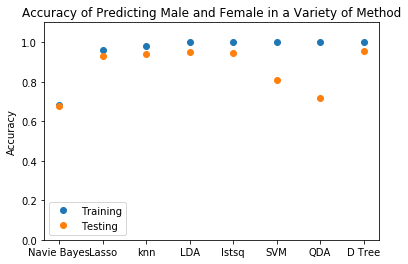

In [200]:
training = [0.9994858611825193, 0.961439588688946, 0.9784061696658097, 0.6843187660668381, 0.9989717223650385, 1.0, \
           0.9994858611825193, 1.0]
testing = [0.944558521560575, 0.9322381930184805, 0.9404517453798767, 0.675564681724846, 0.9486652977412731, 0.7166324435318275, \
            0.8069815195071869, 0.9568788501026694 ]
name = ["lstsq", "Lasso", "knn", "Navie Bayes", "LDA", "QDA", "SVM", "D Tree"]

inds = np.array(training).argsort()
training = np.array(training)[inds]
testing = np.array(testing)[inds]
name = np.array(name)[inds]

plt.xticks(range(len(training)), name)
plt.plot(range(len(training)), training, 'o')
plt.plot(range(len(testing)), testing, 'o')
plt.legend(["Training", "Testing"])
plt.ylabel("Accuracy")
plt.title("Accuracy of Predicting Male and Female in a Variety of Method")
plt.ylim([0,1.1])

(0, 1.1)

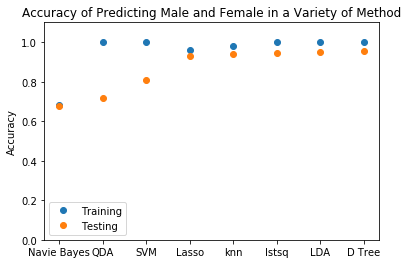

In [201]:
training = [0.9994858611825193, 0.961439588688946, 0.9784061696658097, 0.6843187660668381, 0.9989717223650385, 1.0, \
           0.9994858611825193, 1.0]
testing = [0.944558521560575, 0.9322381930184805, 0.9404517453798767, 0.675564681724846, 0.9486652977412731, 0.7166324435318275, \
            0.8069815195071869, 0.9568788501026694 ]
name = ["lstsq", "Lasso", "knn", "Navie Bayes", "LDA", "QDA", "SVM", "D Tree"]

inds = np.array(testing).argsort()
training = np.array(training)[inds]
testing = np.array(testing)[inds]
name = np.array(name)[inds]

plt.xticks(range(len(training)), name)
plt.plot(range(len(training)), training, 'o')
plt.plot(range(len(testing)), testing, 'o')
plt.legend(["Training", "Testing"])
plt.ylabel("Accuracy")
plt.title("Accuracy of Predicting Male and Female in a Variety of Method")
plt.ylim([0,1.1])